In [987]:
import pandas as pd
import re

In [988]:
df = pd.read_csv('car_data.csv')

In [989]:
df.head()

,bodyType,curbWeight,cvnaCategories,doors,drivetrainDescription,engineDescription,exteriorColor,exteriorColorOEM,fairMarketValue,frontHeadRoom,...,highlights,towCapacity,brochureUrl,windowStickerUrl,evMpgeCity,evMpgeHighway,evRange,evTaxCreditAmount,remainingBatteryWarrantyMiles,remainingBatteryWarrantyMonths
0,Wagon,2888.0,"[{'name': 'Braking & Traction', 'cvnaFeatures'...",4,FWD,"4-Cyl, 2.0 Liter",White,Snow White Pearl,19015.0,39.9,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
1,Truck,5898.0,"[{'name': 'Braking & Traction', 'cvnaFeatures'...",4,4WD,"V8, 5.6 Liter",Red,Cardinal Red Metallic,38172.0,41.0,...,"[{'isResultTileDisplayable': False, 'isVdpDisp...",9210.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
2,Sedan,2859.0,"[{'name': 'Braking & Traction', 'cvnaFeatures'...",4,FWD,"4-Cyl, 2.0 Liter",Black,Black,7230.0,38.2,...,"[{'isResultTileDisplayable': False, 'isVdpDisp...",NaN,https://brochure.carvana.io/volkswagen/2015-je...,NaN,0.0,0.0,0.0,NaN,NaN,NaN
3,Truck,4279.0,"[{'name': 'Braking & Traction', 'cvnaFeatures'...",4,FWD,"V6, i-VTEC, 3.5 Liter",Black,NaN,25582.0,40.1,...,"[{'isResultTileDisplayable': False, 'isVdpDisp...",5000.0,https://brochure.carvana.io/honda/2019-ridgeli...,NaN,0.0,0.0,0.0,NaN,NaN,NaN
4,SUV,3490.0,"[{'name': 'Braking & Traction', 'cvnaFeatures'...",4,AWD,"4-Cyl, Turbo, 1.5 Liter",White,Summit White,28755.0,40.0,...,"[{'isResultTileDisplayable': False, 'isVdpDisp...",1500.0,NaN,https://windowsticker.carvana.io/GeneralMotors...,0.0,0.0,0.0,NaN,NaN,NaN


### Filling in null values

In [990]:
def fill_null_values(data, groupby_cols, result_col):
    return data[result_col].fillna(df.groupby(groupby_cols)[result_col].transform('mean')).round()

In [991]:
#### Horsepower
df['horsePower'] = fill_null_values(df, ['engineDescription'], 'horsePower')


#groundClearance
df['groundClearance'] = fill_null_values(df, ['make', 'model'], 'groundClearance')

#mpgCity
df['mpgCity'] = fill_null_values(df, ['make', 'model'], 'mpgCity')

df['mpgHighway'] = fill_null_values(df, ['make', 'model'], 'mpgHighway')

df['evMpgeCity'] = fill_null_values(df, ['make', 'model'], 'evMpgeCity')

df['evMpgeHighway'] = fill_null_values(df, ['make', 'model'], 'evMpgeHighway')

df['trunkCapacity'] = fill_null_values(df, ['make', 'model'], 'trunkCapacity')

In [992]:
required_cols = [
    'make',
    'model',
    'bodyType',
    'year',
    'seating',
    'owners',
    'fuelDescription',
    'horsePower',
    'drivetrainDescription',
    'transmission',
    'trunkCapacity',
    'bedLength',
    'mileage',
    'mpgCity',
    'mpgHighway',
    'evRange',
    'evMpgeCity',
    'evMpgeHighway',
    'isAutocheckReportAccidentVehicle',
    'price',
    'url'
]

In [993]:
car_data = df[required_cols]

### Cleaning Transmission column

In [994]:
def cleanTransmission(x):

    if 'manual' in x.lower():
        return 'Manual'
    else:
        return 'Auto'
    

car_data.loc[:, 'transmission']=car_data['transmission'].apply(lambda x: cleanTransmission(x))

In [995]:
car_data.loc[:,'transmission'].value_counts()

transmission
Auto      10342
Manual      865
Name: count, dtype: int64

### Finding Age of the car from Year

In [996]:
car_data['age'] = 2025 - car_data['year']

/var/folders/bk/xhs0vwln2116v0d35hflv8b80000gn/T/ipykernel_1884/675059998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data['age'] = 2025 - car_data['year']


### Changing Column names

In [997]:
car_data.rename(columns={
    'seating': 'seats', 
    'owners': 'numOfOwners',
    'fuelDescription': 'fuelType',
    'milage': 'milesDriven',
    'isAutocheckReportAccidentVehicle': 'hasReportedAccident'}, inplace=True)

/var/folders/bk/xhs0vwln2116v0d35hflv8b80000gn/T/ipykernel_1884/1814660583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data.rename(columns={


In [998]:
car_data.head()

,make,model,bodyType,year,seats,numOfOwners,fuelType,horsePower,drivetrainDescription,transmission,...,mileage,mpgCity,mpgHighway,evRange,evMpgeCity,evMpgeHighway,hasReportedAccident,price,url,age
0,Kia,Soul,Wagon,2024,5,1,Gas,147.0,FWD,Auto,...,12599,27.0,33.0,0.0,0.0,0.0,False,18990,https://www.carvana.com/vehicle/3474709,1
1,Nissan,Titan Crew Cab,Truck,2020,5,2,Gas,400.0,4WD,Auto,...,44123,15.0,21.0,0.0,0.0,0.0,False,38990,https://www.carvana.com/vehicle/3557345,5
2,Volkswagen,Jetta,Sedan,2015,5,3,Gas,115.0,FWD,Auto,...,72182,22.0,33.0,0.0,0.0,0.0,False,13990,https://www.carvana.com/vehicle/3456879,10
3,Honda,Ridgeline,Truck,2019,5,2,Gas,280.0,FWD,Auto,...,63205,18.0,25.0,0.0,0.0,0.0,False,27590,https://www.carvana.com/vehicle/3564066,6
4,GMC,Terrain,SUV,2024,5,1,Gas,175.0,AWD,Auto,...,19923,23.0,28.0,0.0,0.0,0.0,False,25590,https://www.carvana.com/vehicle/3518239,1


In [999]:
car_data.isnull().sum()

make                       0
model                      0
bodyType                   0
year                       0
seats                      0
numOfOwners                0
fuelType                   0
horsePower                 0
drivetrainDescription      0
transmission               0
trunkCapacity            828
bedLength                  0
mileage                    0
mpgCity                  989
mpgHighway               989
evRange                  328
evMpgeCity               301
evMpgeHighway            301
hasReportedAccident        0
price                      0
url                        0
age                        0
dtype: int64

In [1000]:
car_data[car_data['trunkCapacity'].isnull()]['bodyType'].value_counts()

bodyType
Truck          692
Hatchback       69
SUV             58
Sedan            7
Convertible      2
Name: count, dtype: int64

In [1001]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [1002]:
def format_k_m(x, pos):
    if x >= 1e6:
        return f'{x*1.0/1e6:.1f}M'
    elif x >= 1e3:
        return f'{x*1.0/1e3:.0f}K'
    else:
        return f'{x:.0f}'

In [1003]:
mean_order = (
    df.groupby('make')['price']
    .mean()
    .sort_values(ascending=False)
    .index
)

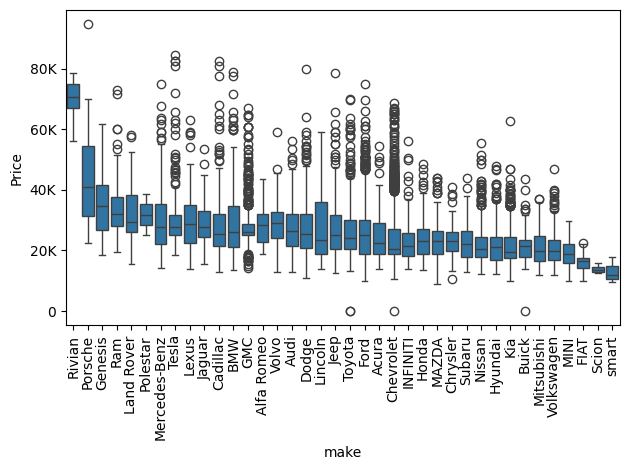

In [1004]:
sns.boxplot(data=car_data, x='make', y='price', order=mean_order)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_k_m))
plt.xticks(rotation=90)
plt.ylabel("Price")
plt.tight_layout()
plt.show()

In [1005]:
mean_order

Index(['Rivian', 'Porsche', 'Genesis', 'Ram', 'Land Rover', 'Polestar',
       'Mercedes-Benz', 'Tesla', 'Lexus', 'Jaguar', 'Cadillac', 'BMW', 'GMC',
       'Alfa Romeo', 'Volvo', 'Audi', 'Dodge', 'Lincoln', 'Jeep', 'Toyota',
       'Ford', 'Acura', 'Chevrolet', 'INFINITI', 'Honda', 'MAZDA', 'Chrysler',
       'Subaru', 'Nissan', 'Hyundai', 'Kia', 'Buick', 'Mitsubishi',
       'Volkswagen', 'MINI', 'FIAT', 'Scion', 'smart'],
      dtype='object', name='make')

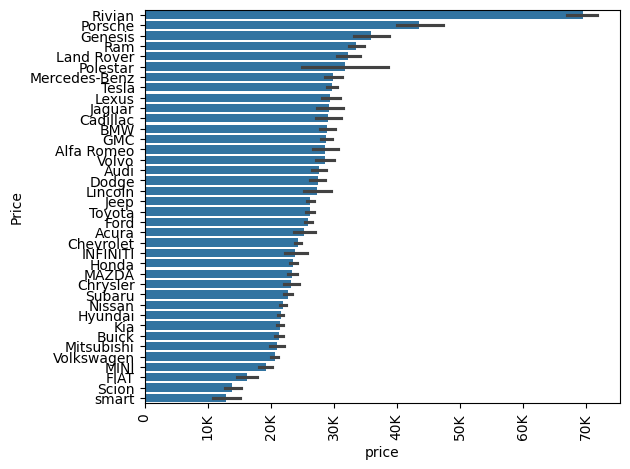

In [1006]:
sns.barplot(data=car_data, x='price', y='make', order=mean_order)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_k_m))
plt.xticks(rotation=90)
plt.ylabel("Price")
plt.tight_layout()
plt.show()

In [1007]:
car_data = car_data.drop(columns=['year', 'url'])

In [1009]:
car_data.to_csv('cleaned_data.csv')